# Neural network model

Ako baseline model sme použili regresnú neurónovú sieť, skladajúcu sa zo 4 DENSE vrstiev(16-8-4-4) s aktivačnou funkciou RELU. Po vytvorení tohto modelu sme sa rozhodli vytvoriť iný baseline model, keďže výsledky pôvodne plánovaného modelu sme vyhodnotili ako nedostačné.

In [1]:
%load_ext autoreload
%autoreload 2

%load_ext tensorboard

import datetime
import os
import sys
sys.path.append('..')

import tensorflow as tf
import tensorflow.keras as keras
import numpy as np
from matplotlib import pyplot


In [2]:
def timestamp():
    return datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
def logName(string=0,dropout=1,lr=0.1,batch=64):
    return string + 'dropout_' + str(dropout) + 'lr' + str(lr) + 'batch' + str(batch) + '__' +timestamp()

Načítanie hodnôt z vopred pripraveného datasetu 1.

In [77]:
testx = np.genfromtxt('./../../data/processed/dataSet1TestX1.csv', delimiter=',')[1:]
testy = np.genfromtxt('./../../data/processed/dataSet1TestY1.csv', delimiter=',')

trainx = np.genfromtxt('./../../data/processed/dataSet1TrainX1.csv', delimiter=',')[1:]
trainy = np.genfromtxt('./../../data/processed/dataSet1TrainY1.csv', delimiter=',')

Načítanie hodnôt z vopred pripraveného datasetu 2.

In [79]:
testx = np.genfromtxt('./../../data/processed/dataSet2TestX.csv', delimiter=',')[1:]
testy = np.genfromtxt('./../../data/processed/dataSet2TestY.csv', delimiter=',')

trainx = np.genfromtxt('./../../data/processed/dataSet2TrainX.csv', delimiter=',')[1:]
trainy = np.genfromtxt('./../../data/processed/dataSet2TrainY.csv', delimiter=',')

Načítanie hodnôt z vopred pripraveného datasetu 3.

In [82]:
testx = np.genfromtxt('./../../data/processed/dataSet3TestX.csv', delimiter=',')[1:]
testy = np.genfromtxt('./../../data/processed/dataSet3TestY.csv', delimiter=',')

trainx = np.genfromtxt('./../../data/processed/dataSet3TrainX.csv', delimiter=',')[1:]
trainy = np.genfromtxt('./../../data/processed/dataSet3TrainY.csv', delimiter=',')

In [84]:
testx = np.genfromtxt('./../../data/processed/dataSet4TestX.csv', delimiter=',')[1:]
testy = np.genfromtxt('./../../data/processed/dataSet4TestY.csv', delimiter=',')

trainx = np.genfromtxt('./../../data/processed/dataSet4TrainX.csv', delimiter=',')[1:]
trainy = np.genfromtxt('./../../data/processed/dataSet4TrainY.csv', delimiter=',')

In [86]:
testx = np.genfromtxt('./../../data/processed/dataSet5TestX.csv', delimiter=',')[1:]
testy = np.genfromtxt('./../../data/processed/dataSet5TestY.csv', delimiter=',')[1:]

trainx = np.genfromtxt('./../../data/processed/dataSet5TrainX.csv', delimiter=',')[1:]
trainy = np.genfromtxt('./../../data/processed/dataSet5TrainY.csv', delimiter=',')[1:]

Prvý model s  DENSE vrstvami.

In [4]:
def dense_residual(X,width):

    X_residuum = X

    X = keras.layers.Dense(width, activation='relu')(X)
    X = keras.layers.Dense(width, activation='relu')(X)
    X = keras.layers.Dense(width, activation='relu')(X)
    X = keras.layers.Dense(width, activation='relu')(X)   
#     X = keras.layers.Dense(width, activation='relu')(X)
    # Final step: Add shortcut value to main path, and pass it through a RELU activation (≈2 lines)
    X = keras.layers.Add()([X, X_residuum])
    X = keras.layers.Activation('relu')(X)
   
    """
    X - tensor tvaru (batch,X)
    """ 
#     print(X.shape)
    return X

In [35]:
def Residual_model(input_shape=(25), classes=16):
    
    X_input = keras.Input(input_shape)
    
    X = keras.layers.Dense(256, activation='relu')(X_input)
    X = keras.layers.Dense(128, activation='relu')(X)
    X = dense_residual(X,128)
    
    X = keras.layers.Dropout(0.2)(X) 
    X = keras.layers.Dense(64, activation='relu')(X)
    X = dense_residual(X,64)
    
    X = keras.layers.Dropout(0.2)(X) 
    X = keras.layers.Dense(32, activation='relu')(X)
    X = dense_residual(X,32)

    # output layer
    X = keras.layers.Dense(classes, activation='softmax', name='fc' + str(classes))(X)
    
    # Create model
    model = keras.models.Model(inputs = X_input, outputs = X, name='Residual_model')

    return model

In [89]:
def Baseline_model(input_shape=(25), classes=16):

    X_input = keras.Input(input_shape)    
    X = keras.layers.Dense(256, activation='relu')(X_input)
    X = keras.layers.Dense(128, activation='relu')(X)
    X = keras.layers.Dense(64, activation='relu')(X)
#     X = keras.layers.Dropout(0.2)(X) 
    X = keras.layers.Dense(32, activation='relu')(X)

    # output layer
    X = keras.layers.Dense(classes, activation='softmax', name='fc' + str(classes))(X)
    
    
    # Create model
    model = keras.models.Model(inputs = X_input, outputs = X, name='Baseline_model')

    return model

In [93]:
model = Baseline_model(input_shape = trainx.shape[1:], classes = 18)
# model = Residual_model(input_shape = trainx.shape[1:], classes = 18)

model.compile(loss='sparse_categorical_crossentropy',  
#               optimizer=keras.optimizers.SGD(lr=0.005),
#               optimizer=keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False),
              optimizer=keras.optimizers.RMSprop(learning_rate=0.00001),
              metrics=['sparse_categorical_accuracy'])

history = model.fit(trainx, trainy,
          validation_data=(testx, testy),
          shuffle=True,
          batch_size=128,
          epochs=75,
          callbacks = [keras.callbacks.TensorBoard(
              log_dir=os.path.join("./../../logs", logName('B-5', 'none' , 'RMS-0.00001', 128)),
              histogram_freq=1)],
          verbose=1);

Train on 9013 samples, validate on 2253 samples
Epoch 1/75
9013/9013 [==============================] - 1s 112us/sample - loss: 2.8188 - sparse_categorical_accuracy: 0.0900 - val_loss: 2.7818 - val_sparse_categorical_accuracy: 0.1292
Epoch 2/75
9013/9013 [==============================] - 0s 38us/sample - loss: 2.7433 - sparse_categorical_accuracy: 0.1641 - val_loss: 2.7002 - val_sparse_categorical_accuracy: 0.2188
Epoch 3/75
9013/9013 [==============================] - 0s 38us/sample - loss: 2.6665 - sparse_categorical_accuracy: 0.2215 - val_loss: 2.6261 - val_sparse_categorical_accuracy: 0.2521
Epoch 4/75
9013/9013 [==============================] - 0s 40us/sample - loss: 2.6060 - sparse_categorical_accuracy: 0.2350 - val_loss: 2.5715 - val_sparse_categorical_accuracy: 0.2552
Epoch 5/75
9013/9013 [==============================] - 0s 42us/sample - loss: 2.5617 - sparse_categorical_accuracy: 0.2390 - val_loss: 2.5311 - val_sparse_categorical_accuracy: 0.2534
Epoch 6/75
9013/9013 [====

Epoch 45/75
9013/9013 [==============================] - 0s 33us/sample - loss: 2.2007 - sparse_categorical_accuracy: 0.2424 - val_loss: 2.2033 - val_sparse_categorical_accuracy: 0.2583
Epoch 46/75
9013/9013 [==============================] - 0s 32us/sample - loss: 2.1971 - sparse_categorical_accuracy: 0.2428 - val_loss: 2.2000 - val_sparse_categorical_accuracy: 0.2583
Epoch 47/75
9013/9013 [==============================] - 0s 34us/sample - loss: 2.1935 - sparse_categorical_accuracy: 0.2429 - val_loss: 2.1970 - val_sparse_categorical_accuracy: 0.2583
Epoch 48/75
9013/9013 [==============================] - 0s 33us/sample - loss: 2.1900 - sparse_categorical_accuracy: 0.2428 - val_loss: 2.1941 - val_sparse_categorical_accuracy: 0.2583
Epoch 49/75
9013/9013 [==============================] - 0s 32us/sample - loss: 2.1866 - sparse_categorical_accuracy: 0.2422 - val_loss: 2.1912 - val_sparse_categorical_accuracy: 0.2583
Epoch 50/75
9013/9013 [==============================] - 0s 33us/sampl

In [95]:
values = model.predict(testx[:20])

In [96]:
print(np.argmax(values,axis=1))

[3 6 4 5 5 7 7 5 5 3 9 5 5 9 3 5 6 4 9 3]


In [63]:
testy[:20]

array([ 7.,  3.,  5.,  7.,  6.,  4.,  8.,  7.,  8.,  2.,  3.,  7.,  9.,
        9.,  7., 10.,  5.,  7.,  8.,  1.])

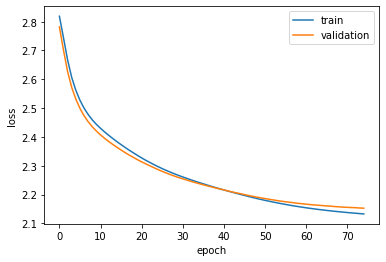

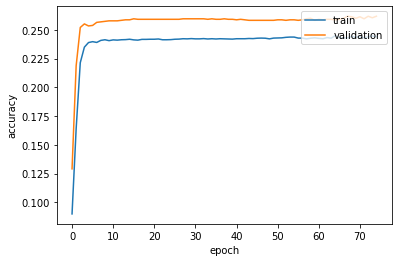

In [94]:
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

pyplot.plot(history.history['sparse_categorical_accuracy'])
pyplot.plot(history.history['val_sparse_categorical_accuracy'])
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [95]:
 %tensorboard --logdir=./../../logs --bind_all

In [100]:
model = Baseline_model(input_shape = trainx.shape[1:], classes = 18)
model.add(keras.layers.Embedding(1000, output_dim=100, input_length=23))


# Add a LSTM layer with 128 internal units.
# model.add(keras.layers.GRU(32))
# model.add(keras.layers.Dense(16, activation='relu'))
# model.add(keras.layers.Dense(8, activation='relu'))
# model.add(keras.layers.Dense(4, activation='relu'))
# model.add(keras.layers.Dropout(0.2))
# model.add(keras.layers.Dense(1, activation='relu'))

# model.compile(loss='mean_squared_error',  
#               optimizer=keras.optimizers.SGD(lr=0.03,  nesterov=True),
#               metrics=['MAE'])

# history = model.fit(trainx, trainy,
#           validation_data=(testx, testy),
#           shuffle=True,
#           batch_size=128,
#           epochs=30);

input_array = np.random.randint(1000, size=(200, 23))

model.compile('rmsprop', 'mse')
output_array = model.predict(input_array)
print(output_array.shape)

(200, 23, 100)


Po tomto modeli sme sa rozhodli, že vytvoríme klasifikačnú rekurentnú neurónovú sieť(RNN). Model sme sa snažili priradiť do jednej zo 16 klasifikačných tried, pričom každá trieda symbolizovala počet gólov(v prípade, že mal byť výsledok 7 gólov a sieť ho odhadla správne, tak je najvyššia hodnota pravdepodobnost na indexe číslo 6 vo výslednom vektore). 

- Na trénovanie sme použili LSTM vrstvu, ktorú sme neskôr kvôli rýchlejšiemu trénovaniu nahradili GRU vrstvou. 
- Po tejto vrstve sme použili dense vrstvu so softmax aktiváciou, SGD optimizerom a sparse_categorical_crossentropy loss funkciou. 

Neskôr sme pridávali rôzne vrstvy, ktoré však väčšinou nemali veľký vplyv na výsledok. S nami otestovaných sietí boli najlepšie tieto:

Embedding(input_dim=64, output_dim=1)
- GRU(32) ->
- Dense(16, activation='relu') ->
- Dense(16, activation='softmax')

hyperparametre:
- SGD(lr=0.01, momentum=0.65, nesterov=True)
- loss='sparse_categorical_crossentropy'
- metrics='sparse_categorical_accuracy'
- batch_size=128
 - epochs=25

In [ ]:
def Baseline_model(input_shape=(25), classes=16):

    # Define the input as a tensor with shape input_shape
    X_input = keras.Input(input_shape)    
    X = keras.layers.Dense(256, activation='relu')(X_input)
    X = keras.layers.Dense(128, activation='relu')(X)
    X = keras.layers.Dense(64, activation='relu')(X)
    X = keras.layers.Dropout(0.2)
    X = keras.layers.Dense(32, activation='relu')(X)

    # output layer
    X = keras.layers.Dense(classes, activation='softmax', name='fc' + str(classes))(X)
    
    
    # Create model
    model = keras.models.Model(inputs = X_input, outputs = X, name='Baseline_model')

    return model

In [130]:
model = Baseline_model(input_shape = trainx.shape[1:], classes = 18)



model.compile(loss='sparse_categorical_crossentropy',  
              optimizer=keras.optimizers.SGD(lr=0.001),
              metrics=['sparse_categorical_accuracy'])

history = model.fit(trainx, trainy,
          validation_data=(testx, testy),
          shuffle=True,
          batch_size=512,
          epochs=75,
#           tensorboard_callback = keras.callbacks.TensorBoard(
#     log_dir=os.path.join("./../../logs", logName(dropout, lr, batch_size)),
#     histogram_freq=1)
          verbose=1);


values = model.predict(testx[:10])

Train on 7880 samples, validate on 1969 samples
Epoch 1/100
7880/7880 [==============================] - 1s 128us/sample - loss: 2.8742 - sparse_categorical_accuracy: 0.1208 - val_loss: 2.5825 - val_sparse_categorical_accuracy: 0.1701
Epoch 2/100
7880/7880 [==============================] - 0s 28us/sample - loss: 2.5549 - sparse_categorical_accuracy: 0.2014 - val_loss: 2.4523 - val_sparse_categorical_accuracy: 0.2514
Epoch 3/100
7880/7880 [==============================] - 0s 29us/sample - loss: 2.4729 - sparse_categorical_accuracy: 0.2151 - val_loss: 2.3774 - val_sparse_categorical_accuracy: 0.2529
Epoch 4/100
7880/7880 [==============================] - 0s 28us/sample - loss: 2.4110 - sparse_categorical_accuracy: 0.2227 - val_loss: 2.3282 - val_sparse_categorical_accuracy: 0.2539
Epoch 5/100
7880/7880 [==============================] - 0s 34us/sample - loss: 2.3878 - sparse_categorical_accuracy: 0.2140 - val_loss: 2.2950 - val_sparse_categorical_accuracy: 0.2529
Epoch 6/100
7880/7880

Epoch 88/100
7880/7880 [==============================] - 0s 29us/sample - loss: 2.1617 - sparse_categorical_accuracy: 0.2306 - val_loss: 2.1222 - val_sparse_categorical_accuracy: 0.2656
Epoch 89/100
7880/7880 [==============================] - 0s 27us/sample - loss: 2.1598 - sparse_categorical_accuracy: 0.2299 - val_loss: 2.1234 - val_sparse_categorical_accuracy: 0.2661
Epoch 90/100
7880/7880 [==============================] - 0s 31us/sample - loss: 2.1571 - sparse_categorical_accuracy: 0.2316 - val_loss: 2.1224 - val_sparse_categorical_accuracy: 0.2661
Epoch 91/100
7880/7880 [==============================] - 0s 36us/sample - loss: 2.1613 - sparse_categorical_accuracy: 0.2359 - val_loss: 2.1222 - val_sparse_categorical_accuracy: 0.2656
Epoch 92/100
7880/7880 [==============================] - 0s 29us/sample - loss: 2.1542 - sparse_categorical_accuracy: 0.2349 - val_loss: 2.1214 - val_sparse_categorical_accuracy: 0.2656
Epoch 93/100
7880/7880 [==============================] - 0s 28us

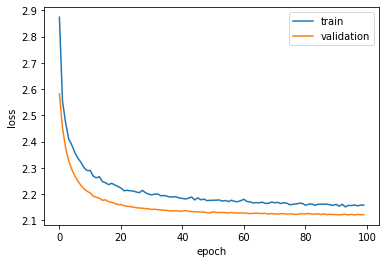

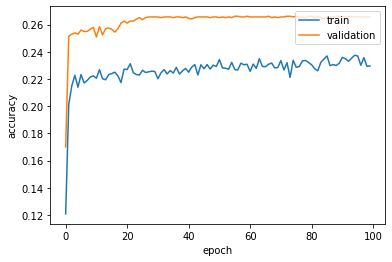

In [131]:
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

pyplot.plot(history.history['sparse_categorical_accuracy'])
pyplot.plot(history.history['val_sparse_categorical_accuracy'])
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [ ]:
 %tensorboard --logdir logs --bind_all

Embedding(input_dim=64, output_dim=1)
- GRU(32) ->
- Dropout(0.2) ->
- Dense(16, activation='softmax')

Hyperparametre:
- SGD(lr=0.001, decay=1e-6, momentum=0.7, nesterov=False),
- loss='sparse_categorical_crossentropy'
- metrics='sparse_categorical_accuracy'
- batch_size=128
 - epochs=30

In [129]:
model = tf.keras.Sequential()
model.add(keras.layers.Embedding(input_dim=64, output_dim=1))

# Add a LSTM layer with 128 internal units.
model.add(keras.layers.GRU(32))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(16, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',  
              optimizer=keras.optimizers.SGD(lr=0.01, momentum=0.65, nesterov=True),
              metrics=['sparse_categorical_accuracy'])

history = model.fit(trainx, trainy,
          validation_data=(testx, testy),
          shuffle=True,
          batch_size=128,
          epochs=100);

values = model.predict(testx[:10])

Train on 7880 samples, validate on 1969 samples
Epoch 1/100
7880/7880 [==============================] - 2s 307us/sample - loss: 2.6788 - sparse_categorical_accuracy: 0.2363 - val_loss: 2.5747 - val_sparse_categorical_accuracy: 0.2656
Epoch 2/100
7880/7880 [==============================] - 1s 77us/sample - loss: 2.5011 - sparse_categorical_accuracy: 0.2364 - val_loss: 2.3971 - val_sparse_categorical_accuracy: 0.2656
Epoch 3/100
7880/7880 [==============================] - 1s 79us/sample - loss: 2.3554 - sparse_categorical_accuracy: 0.2280 - val_loss: 2.2686 - val_sparse_categorical_accuracy: 0.2656
Epoch 4/100
7880/7880 [==============================] - 1s 78us/sample - loss: 2.2678 - sparse_categorical_accuracy: 0.2310 - val_loss: 2.2039 - val_sparse_categorical_accuracy: 0.2656
Epoch 5/100
7880/7880 [==============================] - 1s 79us/sample - loss: 2.2237 - sparse_categorical_accuracy: 0.2305 - val_loss: 2.1705 - val_sparse_categorical_accuracy: 0.2656
Epoch 6/100
7880/7880

KeyboardInterrupt: 

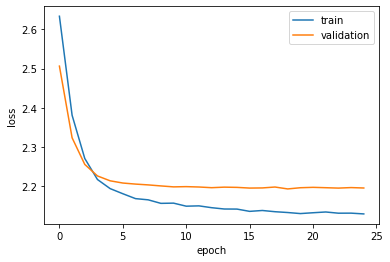

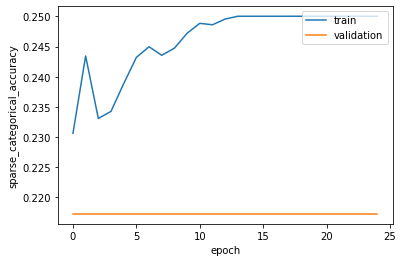

In [9]:
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['val_loss'])
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

pyplot.plot(history.history['sparse_categorical_accuracy'])
pyplot.plot(history.history['val_sparse_categorical_accuracy'])
pyplot.ylabel('sparse_categorical_accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()


In [19]:
 %tensorboard --logdir logs --bind_all

Sparse_categorical_accuracy bola v obidvoch modeloch na hranici **25%**, pričom aj pri zmene hyperparametrov a architektúry nebolo možné dosiahnuť vyššiu presnosť. Vyššie popísané architektúry boli použité z toho dôvodu, lebo dokázali najlepšie minimalizovať loss funkciu(**na hodnotu 2**), pričom pri ostatných architektúrach bola táto hodnota **2,7**. 